In [106]:
import tensorflow as tf # pip install tensorflow

# Loading - "MNIST Data Set"
# Containing training samples = 60,000, Testing Samples = 10,000
# TensorFlow Already contain MNIST data set which can be loaded using Keras

In [107]:
mnist = tf.keras.datasets.mnist # this is basically handwritten digits based on 28x28 sized images from 0 to 9

## After loading the MNIST data, Divide into Train and Test datasets

In [108]:
# unpacking the dataset into train and test datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [109]:
# test if the dataset has loaded
x_train.shape 
# y_test.shape

(60000, 28, 28)

In [110]:
import matplotlib.pyplot as plt # pip install matplotlib

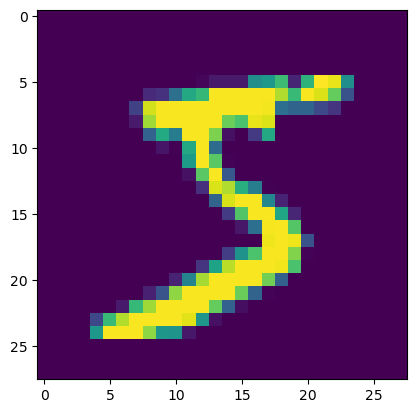

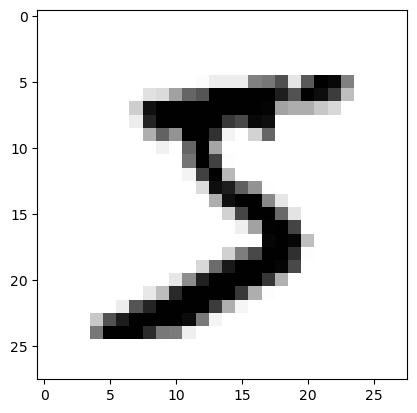

In [111]:
## just check the graph, how data looks like
plt.imshow(x_train[0])
plt.show() # in order to execute the graph
## however we dont know whether its color image or binary images
## so inorder to plot it change the configuration
plt.imshow(x_train[0], cmap= plt.cm.binary)

# Checking the values of each pixel
# Before Normalization

In [112]:
print (x_train[0]) ## before normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## As images are in Gray level (1 channel ==> 0, 255), not colored
# Normalizing the data | Pre-Processing Step

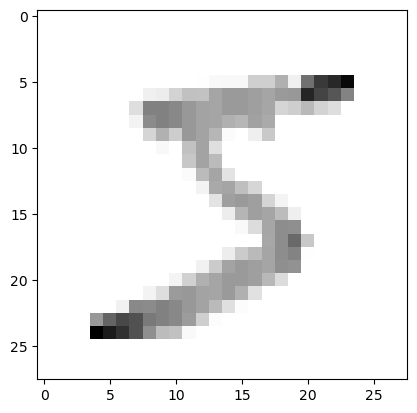

In [113]:
## in order to normalize it
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

# After Normalizing

In [114]:
print(x_train[0]) ## we can see that all values are now normalized

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [115]:
print (y_train[0]) ## just to check that we have labels inside our dataset

5


# Resizing the image to make it suitable for applying Convolutional operation

In [116]:
import numpy as np # pip install numpy

In [117]:
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) ### increasing one dimension for kernal/filter operation
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1) ### increasing one dimension for kernal/filter operation
print("Training Samples Dimension", x_trainr.shape)
print("Testing Samples Dimension", x_testr.shape)

Training Samples Dimension (60000, 28, 28, 1)
Testing Samples Dimension (10000, 28, 28, 1)


# Creating a Deep Neural Network
### Training on 60,000 samples of MNIST handwritten dataset 

In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [119]:
### Creating a neural network now
model = Sequential()

### 1st Convolution Layer - (28-3+1)/2 -> 13*13
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:])) ## only for 1st convolution layer we mention input layer size
model.add(Activation("relu")) ## activation function to make it non-linear, (<0 then remove) (>0 it will allow to next layer)
model.add(MaxPooling2D(pool_size=(2,2))) ## Maxpooling single maxvalue of 2x2

### 2nd Convolution Layer - (13-3+1)/2 -> 5*5
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu")) ## activation function
model.add(MaxPooling2D(pool_size=(2,2))) ## Maxpooling

### 3rd Convolution Layer - (5-3+1)/2 -> 1*1
model.add(Conv2D(64, (3,3))) 
model.add(Activation("relu")) ## activation function
model.add(MaxPooling2D(pool_size=(2,2))) ## Maxpooling

### Fully Connected Layer #1 - 22*22 -> 484
model.add(Flatten()) ## vefore using fully connected layer, need to be flattern like 2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))

### Fully Connected Layer #2
model.add(Dense(32))
model.add(Activation("relu"))

### Fully Connected Layer #3
model.add(Dense(16))
model.add(Activation("relu"))

### Last Fully Connected Layer, output must be equal to number of classes, 10 (0-9)
model.add(Dense(10)) ## this last dense Layer must be equal to 10
model.add(Activation("softmax")) ## activation function is changed to softmax (Class probabilities)

In [120]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,434 (318.10 KB)

 Trainable params: 81,434 (318.10 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
print("total Training Samples = ", len(x_trainr))

total Training Samples =  60000


In [122]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])

In [123]:
# CallBacks

from keras.callbacks import EarlyStopping, ModelCheckpoint

# Earlystopping

es = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=4, verbose=1)

# Model check point

mc = ModelCheckpoint("./bestModel.keras", monitor="val_acc", mode='max', verbose=1, save_best_only=True)

cb = [mc]

In [124]:
model.fit(x_trainr, y_train, epochs=50, validation_split = 0.3, callbacks=cb) ## Training the model

Epoch 1/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7405 - loss: 0.7649
Epoch 1: finished saving model to ./bestModel.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8763 - loss: 0.3859 - val_accuracy: 0.9418 - val_loss: 0.1956
Epoch 2/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9597 - loss: 0.1306
Epoch 2: finished saving model to ./bestModel.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9628 - loss: 0.1226 - val_accuracy: 0.9682 - val_loss: 0.1037
Epoch 3/50
1306/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9728 - loss: 0.0897
Epoch 3: finished saving model to ./bestModel.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9733 - loss: 0.0847 - val_accuracy: 0.9774 - val_loss: 0.0771
Epoch 4/50
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9789 - loss: 0.0659
Epoch 4: finished saving model to ./bestModel.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9799 - loss: 0.0656 - val_

In [125]:
import keras
model_s = keras.models.load_model("bestModel.keras")

# validation acuracy < accuracy(30<98)
## overfitting => solution dropout layers

In [126]:
### Evaluating on testing data set MNIST
test_loss, test_acc = model_s.evaluate(x_testr, y_test)
print("Test Loss on 10,000 test samples", test_loss)
print("validation Accuracy on 10,000 test samples", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9853 - loss: 0.1108
Test Loss on 10,000 test samples 0.1108391135931015
validation Accuracy on 10,000 test samples 0.9853000044822693


In [127]:
## predictions = new_model.predict(x_test])
## there is specialized method for efficiently saving your model, to name all input
## therefore instead of using new mdel loaded, for now only for predictions I am using simple model
predictions = model.predict([x_testr])

 83/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

c:\Users\PC\anaconda3\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_1028
Received: inputs=('Tensor(shape=(32, 28, 28, 1))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


c:\Users\PC\anaconda3\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_1028
Received: inputs=('Tensor(shape=(None, 28, 28, 1))',)
  warnings.warn(msg)


In [128]:
print (predictions) ##actually these predictions are based on one hot encoding, so these are only arrays

[[2.0897717e-19 5.6625687e-18 5.7736623e-13 ... 1.0000000e+00
  7.0564307e-19 2.0666055e-13]
 [9.0659574e-07 5.0340577e-06 9.9996877e-01 ... 4.8721472e-07
  2.9534853e-08 2.4640864e-10]
 [5.6547977e-18 1.0000000e+00 5.3987162e-11 ... 1.2242017e-09
  1.2582166e-13 1.4411790e-11]
 ...
 [5.3430826e-18 1.7010031e-14 1.4930710e-19 ... 7.2628154e-18
  5.4460869e-10 2.2712328e-10]
 [6.0696968e-11 1.4738528e-12 4.7911354e-25 ... 1.1593379e-17
  7.7198206e-11 8.9585818e-11]
 [5.9477276e-07 7.3424166e-13 1.8777567e-13 ... 1.4789638e-11
  1.4115958e-10 1.9832911e-13]]


In [129]:
## in order to understand, convert the predicitons from one hot encoding, we need to use numpy for that
print (np.argmax(predictions[7])) ## so argmax will return the maximum value index and find the value of it

9


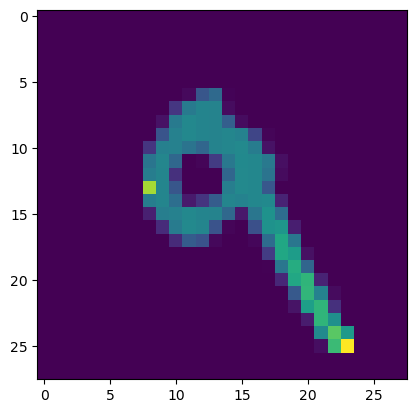

In [130]:
### now to check that it is the correct answer
plt.imshow(x_test[7])

In [131]:
## in order to understand, convert the predicitons from one hot encoding, we need to use numpy for that
print (np.argmax(predictions[128])) ## so argmax will return the maximum value index and find the value of it

8


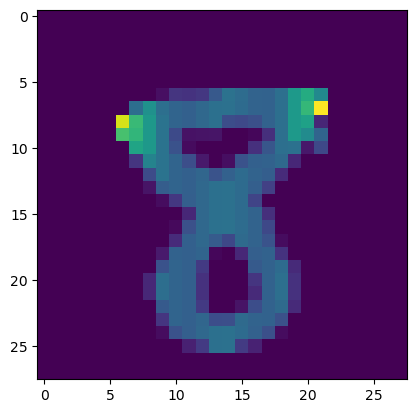

In [132]:
### now to check that it is the correct answer
plt.imshow(x_test[128])

In [133]:
import cv2 ## pip install opencv-python

In [134]:
img = cv2.imread('Nine.png')

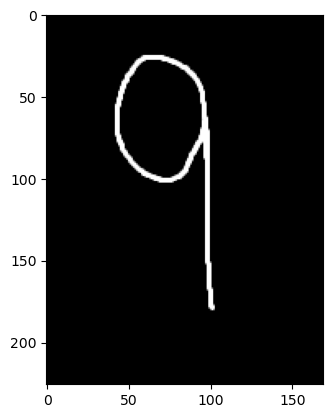

In [135]:
plt.imshow(img)

In [136]:
img2 = cv2.imread('Three.png')

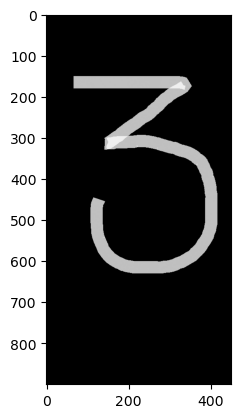

In [137]:
plt.imshow(img2)

In [138]:
img.shape

(226, 169, 3)

In [139]:
img2.shape

(900, 450, 3)

In [140]:
## to turn the color image to gray or black n white
gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [141]:
gray1.shape

(226, 169)

In [142]:
gray2.shape

(900, 450)

In [143]:
resized1 = cv2.resize(gray1, (28,28), interpolation = cv2.INTER_AREA)
resized2 = cv2.resize(gray2, (28,28), interpolation = cv2.INTER_AREA)

In [144]:
resized1.shape

(28, 28)

In [145]:
resized2.shape

(28, 28)

In [146]:
## 0 to 1 scaling
newImg1 = tf.keras.utils.normalize(resized1, axis = 1) 
newImg2 = tf.keras.utils.normalize(resized2, axis = 1) 

In [147]:
# kernal operation of convolution layer
newImg1 = np.array(newImg1).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 
newImg2 = np.array(newImg2).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [148]:
newImg1.shape

(1, 28, 28, 1)

In [149]:
newImg2.shape

(1, 28, 28, 1)

In [150]:
prediction1 = model.predict(newImg1)
prediction2 = model.predict(newImg2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [151]:
print (np.argmax(prediction1))
print (np.argmax(prediction2))

9
3


In [152]:
print(prediction1)

[[6.0535904e-06 2.2452951e-08 4.5047747e-07 3.6941830e-05 3.1577928e-03
  8.3679850e-05 2.6912733e-07 8.2817533e-06 1.6886795e-04 9.9653769e-01]]
